# Čistenie a predspracovanie dát

### Róbert Móro, Jakub Ševcech

IAU, 25.10.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2018-19

# Oznam

Kedze budu buduci tyzden sviatky a posuva sa nam cely tyzden vyucby, rozhodli sme sa
odovzdavanie 2. fazy projektu posunut z 18.11 na 25.11.

# Osnova

## Kratka ukazka vycistenia dat

## Zakladne ulohy cistenia dat

1. ### Chybajuce hodnoty

2.  ### Vychylene hodnoty

3.  ### Normalizacia udajov

4. ### Transformacia typu dat

> #### Numericke atributy na kategoricke

> ####  Kategoricke atributy na numericke

# Preco cistenie dat?
## Real world data are generally
* Incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data
* Noisy: containing errors or outliers
* Inconsistent: containing discrepancies in codes or names

## Tasks in data preprocessing
* Data cleaning: fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies. **(dnes)**
* Data integration: using multiple databases, data cubes, or files. **(pred dvoma tyzdnami)**
* Data transformation: normalization and aggregation. **(dnes)**
* Data reduction: reducing the volume but producing the same or similar analytical results. **(nabuduce)**
* Data discretization: part of data reduction, replacing numerical attributes with nominal ones. **(dnes)**
> niekdy potrebne aj naopak nomunal => numerical

(zdroj: [http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html](http://www.cs.ccsu.edu/~markov/ccsu_courses/DataMining-3.html))

Na predspracovanie odporucame vyuzit kniznicu `scikit-learn`. Moznosti, ktore na predspracovanie ponuka, najdete tu: http://scikit-learn.org/stable/modules/preprocessing.html

Vycerpavajuci zoznam mnozstva dalsich veci, co sa da robit na pripravu dat a na feature engineering najdete tu: http://www.datasciencecentral.com/profiles/blogs/feature-engineering-data-scientist-s-secret-sauce-1

Pekne spracované je predspracovanie a čistenie dát aj tu (akurát s príkladmi v R, nie pythone): https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf Zaujímavá je hlavne časť k chýbajúcim a vychýleným hodnotám.

velmi pekny text opisujuci ocakavania na vycistene data [tu](https://github.com/jtleek/datasharing)

# Ukazka cistenia maleho datasetu

Cistenie dat je velmi explorativna a iterativna uloha. Nikdy neviete na co narazite.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['font.family'] = 'DejaVu Sans' # Tento riadok je tu len na nastyavenie pekneho fontu, Ak by vam to na nom padalo, tak ho pokojne zakomentujte. Padat to moze aj neskor pri pokusoch o vykreslovanie obrazkov
from IPython.display import Image

Mame nas dobre znamy datset kvetiniek Iris, ale je trochu spotvoreny. Skusme si ho popozerat a pokusme sa ho opravit.

In [26]:
iris_data = pd.read_csv('data/iris-data.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [27]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Takze vidime, ze su tam nejake chybajuce hodnoty

In [28]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

Z tohoto vidime nejake zakladne statistiky, ale zatial nic podozrive. Znova vidime chybajuce hodnoty, ale to sme uz vedeli

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


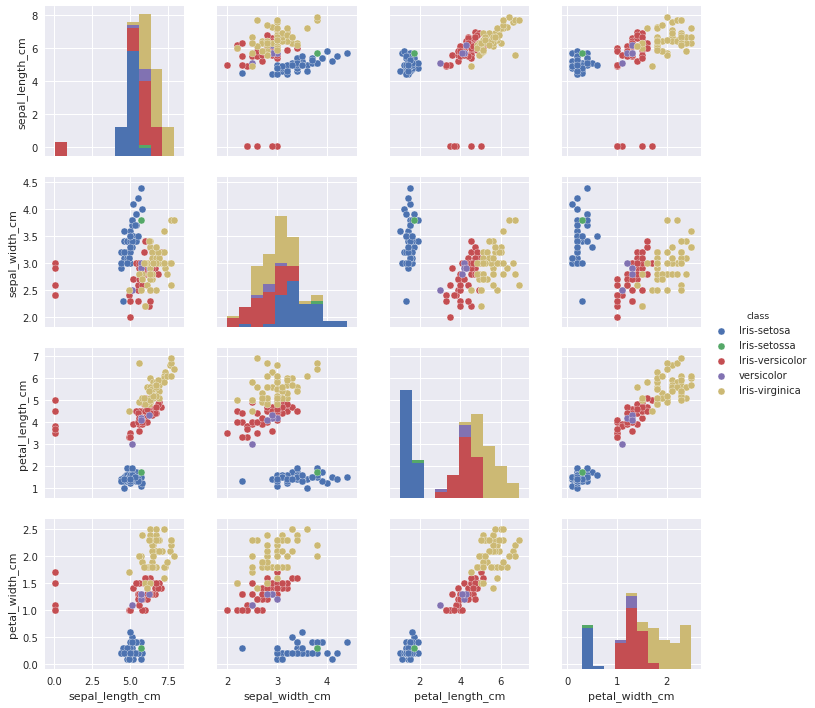

In [29]:
seaborn.pairplot(iris_data, hue='class')

Dostal som kopec varovani o chybnej hodnote. To je sposobene tymi chybajucimi hodnotami. Pre jednoduchost ich zatial vyhodme. 

In [30]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Tu uz zaciname vidiet nejake divne veci. Z toho, co uz vieme o tych datach, tak by tam mali byt len 3 triedy. Zda sa, ze su tam nejake preklepy v nazvoch.

In [31]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
seaborn.pairplot(iris_data.dropna(), hue='class')

Co tam viim dalej su nejake divne osamotene hodnoty *sepal_length_cm* pre Iris-versicolor

In [33]:
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

V histograme su dost mimo

In [34]:
seaborn.boxplot(iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'])

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Aj boxplot mi naznacuje, ze su to nejaky outliery.

Co s nimi? Nejake navrhy?

Podme sa na ne najskor pozriet

In [35]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 ), 'sepal_length_cm']

77    0.067
78    0.060
79    0.057
80    0.055
81    0.055
Name: sepal_length_cm, dtype: float64

In [36]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1 ), 'sepal_length_cm']

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length_cm, dtype: float64

Zda sa, ze len niekto omylom zapisal velkost v metroch a nie v cm

In [37]:
mask = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1 )

iris_data.loc[mask, 'sepal_length_cm'] = iris_data.loc[mask, 'sepal_length_cm'] * 100

In [38]:
iris_data.loc[mask, 'sepal_length_cm']

77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
Name: sepal_length_cm, dtype: float64

In [39]:
seaborn.pairplot(iris_data.dropna(), hue='class')

## Skusme sa pozriet este na tie chybajuce hodnoty

In [42]:
iris_data[iris_data.isnull().any(axis=1)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

Vsetko su to hodnoty z jedneho atributu a z jednej triedy.

Ako by mali tie hodnoty vyzerat?

Pozrime sa ako vyzeraju existujuce hodnoty

In [43]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

Tie hodnoty su cca okolo nejakej najcastejsej hodnoty. Mozeme skusit nahradit tie chybajuce priemernou hodnotou. Alebo mozno medianom.

In [44]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
average_petal_width

0.25111111111111106

In [46]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

In [47]:
seaborn.pairplot(iris_data, hue='class')

Predchadzajuce nehradzanie som naschval napisal ako drevorubac aby ste videli co sa tam vlastne deje. Existuje aj elegantnejsi zapis. Objekt Imputer

In [50]:
from sklearn.preprocessing import Imputer

Znova si teda nacitam tie data

In [61]:
iris_data_cpy = pd.read_csv('data/iris-data.csv')
nan_map = iris_data_cpy.isnull().any(axis=1)
iris_data_cpy[nan_map]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

A doplnim chybajuce hodnoty

In [267]:
imp = Imputer(missing_values='NaN', strategy='mean')
 
iris_data_cpy['petal_width_cm'] = imp.fit_transform(iris_data_cpy[['petal_width_cm']])
iris_data_cpy[nan_map]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             1.3   
8               4.4             2.9              1.4             1.3   
9               4.9             3.1              1.5             1.3   
10              5.4             3.7              1.5             1.3   
11              4.8             3.4              1.6             1.3   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

In [64]:
# Ake su dalsie strategie nahradzania hodnot?
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)
 |      The axis along which to i

Metoda fit_transform najskor natrenuje hodnotu, ktorou sa bude nahradzat a potom ju pouzije pri transformacii.

Existuju aj oddelene metody fit a transform. 
Velmi dolezite pri praci s trenovacou a testovacou sadou dat. Nad testovacou by ste nikdy nemali pustat fit ani fit_transform. Vzdy len transform. Aj transformacia sa vzdy trenujete na trenovacich datach a na testovacich ich uz len pouzivate.

# Chybajuce hodnoty

Aby sme vedeli nieco spravit s chybajucimi hodnotami, tak najskor potrebujeme pochopit mechanizmus vzniku chybajucich hodnot. To zistime bud z dat, spytanim sa ako boli data zbierane alebo hlbsim pochopenim procesu vzniku datasetu.

1. Missing Completely at Random (MCAR)
> Proces vzniku chybajucich hodnot nezalezi od hodnot ani nameranych a ani nenameranych
2. Missing at Random (MAR)
> Zalezi na nameranych datach ale nie na tych chybajucich
3. Missing Not at Random (MNAR)
> Ziadne z predchadzajucich. Zalezi na hodnote chybajucich dat. 

Zoznam je v poradi stupajucej zavaznosti

(Dalsie info: [https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87](https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87))

# Dajme si priklad na datach o prijme nejakej populacie. 
## 1. Missing Completely at Random (MCAR)
> Proces vzniku chybajucich hodnot nezalezi od hodnot ani nameranych a ani nenameranych.

Niektore dotazniky boli v procese zbierania stratene alebo poskodene. 



## 2. Missing at Random (MAR)
> Zalezi na nameranych datach ale nie na tych chybajucich

* Prikald 1: Jeden z dobrovolnikov, ktory data zbieral ich zopar nahodne stratil / zahodil / ukradli mu ich / zjedol mu ich pes .... **Do dat si znacime kto data zbieral.**
* Priklad 2: **Zbierame aj informaciu o pozicii.** Ludia na manazerskych poziciach maju vacsiu pravdepodobnost, ze nam nebudu chciet prezradit plat.

Proces vzniku nahodnych dat je nahodny v ramci podskupin (konkretny zberac dat, nejaka skupina obyvatelstva)

## 3. Missing Not at Random (MNAR)
> Zalezi na hodnote chybajucich dat. 

* Ludia, ktori zarabaju menej ako 600 eur mesacne sa castejsie hanbia priznat svoj plat.

Proces vzniku nie je nahodny. Zalezi od samotnej chybajucej hodnoty.
**Pozor** do dat sa nam dostava systematicka chyba. Castokrat sa ale o nej nemame ako dozvediet. Ak sa o nej dozvieme, tak sa musime snazit ju napravit.

# Opravovanie chybajucich hodnot

Vieme len pre MCAR a MAR.

Pre MNAR vo vseobecnosti nevieme opravit po ukonceni zbierania dat. Nevieme ako velmi sa nam tam prejavila systematicka chyba a nevieme to ani dodatocne zistit, kedze data na zalade ktorych by sme to zistili su prave tie, ktore nam chybaju.

# Strategie nahradzania chybajucich hodnot

Viaceré stratégie. Medzi najčastejšie patria nahradzanie:

* mediánom (numericke data)
* priemerom (numericke data)
* najfrekventovanejsou hodnotou (diskretne data)
* predchadzajucimi metodami v ramci podmnoziny / segmentu definovanom korelovanym atribútom (MAR)
* algoritmus k-najbližších susedov (KNN) - najdenie podobnych pozorovani pomocou znamich atributov a doplnenie chybajucej hodnoty agregovanim hodnot podobnych pozorovani
* pomocou klasifikacneho modelu, kde zavisla premenna je ta chybajuca hodnota a trenovacie data su ostatne pozorovania s atributmi, ktore pozname (pre diskretne data)
* to iste ako predchadzajuce len regresny model pre doplnenie numerickych dat
* dalsie pokrocilejsie metody zalozene na statistickom modelovani dat (Expectation Maximization, Matrix Factorization, SVD, ...)

Tie jednoduche implementovane v scikit-learn (sklearn.preprocessing.Imputer) alebo lahko implementovatelne

Viacero pokrocilejsich v kniznici [fancyinpute](https://pypi.org/project/fancyimpute/)

Ked uz nic nepomaha, tak mazanie. Posledna moznost. 

# Pozor!! 

Pri doplnani chybajucich hodnot je dolezite transformaciu trenovat na trenovacich datach a nie na testovacich.

Naprikald kniznica Fancyinpute ma s tymto pri viacerych metodach problem.

Dve skupiny implementacii:
* Transductive 
> Dokaze sa len naraz trenovat a pouzivat. Po spusteni na testovacej sade sa znova trenuje. Neda sa pouzit v produkcii na datach, ktore sme predtym nevideli. Nie vzdy je to vecou metody, ale len implementacie. Cize teoreticky je to mozne spravit induktivne, len implementacia to neumoznuje. To je napriklad pripad KNN vo Fancyinpute. Vid [dokumentacia](https://pypi.org/project/fancyimpute/)
* Inductive 
> Trenujuce sa na trenovacej sade, po natrenovani pouzitelne na trenovacej aj testovacej sade.
> Toto je to, co v nasom projekte chceme. Imputer v scikit-learn, niektore jednoduchsie metody Fancyinpute, vlastne implementacie ak maju spravne oddelene funkcie fit a transform.



## Skusme si vytvorit jednoduchy induktivny nahradzac cybajucich hodnot

In [260]:
data = np.random.randn(10)
data[2:5] = np.nan
data

array([ 0.3686576 ,  0.2545953 ,         nan,         nan,         nan,
        0.79847261, -0.06112852, -1.50123846, -0.90660366, -1.30368745])

In [261]:
from sklearn.base import TransformerMixin

class MyImputer(TransformerMixin):
    
    def __init__(self, missing_value=np.nan):
        self.missing_value = missing_value
        self.mean = 0
        
    def _get_mask(self, X, value_to_mask):
        if np.isnan(value_to_mask):
            return np.isnan(X)
        else:
            return np.equal(X, value_to_mask)
        
    
    def fit(self, X, y=None):        
        mask = self._get_mask(X, self.missing_value)
        self.mean = np.mean(X[~mask])
        return self
        
    
    def transform(self, X):
        mask = self._get_mask(X, self.missing_value)
        X[mask] = self.mean
        
        return X
        

In [262]:
imp = MyImputer()
imp.fit(data)
new_data = imp.transform(data)
new_data    

array([ 0.3686576 ,  0.2545953 , -0.33584751, -0.33584751, -0.33584751,
        0.79847261, -0.06112852, -1.50123846, -0.90660366, -1.30368745])

In [263]:
imp.mean

-0.3358475135373338

In [94]:
data = np.random.randn(10)
data[2:5] = np.nan

imp = MyImputer()
new_data = imp.fit_transform(data)
new_data  

array([ 0.28792675,  0.20517755,  0.29306288,  0.29306288,  0.29306288,
        0.76290902,  0.25963822,  0.84225601, -0.0968377 , -0.20962966])

fit_transform je vlastne len skombinovanie funkcii fit a transform

![you dont say](https://pics.me.me/you-dont-say-memes-com-14014390.png)

# Vychýlené hodnoty

Aj pri riešení vychýlených hodnôt možno aplikovať viaceré stratégie:

* odstránenie vychýlených (odľahlých) pozorovaní
* nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (5 percentilom, resp. 95 percentilom)
* transformácia atribútu s vychýlenými hodnotami pomocou zvolenej funkcie (logaritmus, odmocnina a pod.)
> toto nie je ani tak metoda na rieenie outlierov ako metoda na uistenie sa, ze tie pozorovania su naozaj outliery

## Pozor

Pri rozhodovaní, čo je, a čo nie je vychýlená hodnota, treba brať do úvahy rozdelenie premennej. Určenie vychýlených hodnôt pomocou boxplotu funguje pre normálne rozdelenie. Ak má premenná iné rozdelenie, môžeme ju transformovať (normalizovať).

# Normalizacia udajov

Toto su data z jednej sutaze. Opisuju nejake atributy sietovych spojeni. Nie je teraz dolezite ake, ale zaujima nas ich tvar a extremne hodnoty.

In [95]:
data_file = "./data/x_train.csv"
challenge_data = pd.read_csv(data_file, nrows=1000, sep=',', header=None)
challenge_data.head()

0         1         2         3         4         5         6   \
0  2.400931  4.235430  7.147523  0.455781 -1.471710  0.368072  1.402726   
1  2.959725 -2.146311  1.201100  4.206000  6.006231  1.064849 -1.838940   
2  3.543542 -0.753945  0.459010  1.193610  4.166587  1.610900 -3.181179   
3 -2.940113  1.279881 -2.462053 -0.744649 -1.845080 -2.705489  1.125120   
4  6.907914 -1.035285 -1.841294 -0.060504  4.320388  2.423103 -5.194417   

         7         8         9     ...           22        23        24  \
0  3.231591 -1.111184  2.542668    ...    -1.278341  0.081948  0.934971   
1 -0.227245 -0.346572 -0.451681    ...    -3.672226 -1.047564 -1.498405   
2 -0.414485 -3.642286  0.527908    ...    -5.564399 -0.667491 -2.781279   
3 -0.839736 -3.896343 -1.120876    ...     3.240573 -0.576021  3.706526   
4 -0.937909 -4.159663  4.763647    ...    -0.639724  1.529124 -2.930810   

         25        26        27        28        29         30        31  
0  0.988862 -2.817641  0.573825  3.931404  0.204244  10.623778 -8.322258  
1 -0.921323 -0.384467 -1.260944 -0.721455  3.082391   6.122824 -2.656565  
2  0.389482 -3.455173  0.395151  1.614165  0.867497   6.588551 -6.279469  
3  1.195011 -1.887120 -0.813390 -0.098769  0.525311  12.889137 -5.339454  
4  0.347728 -3.324413  3.475989  4.956617  0.037510   5.432440 -2.220027  

[5 rows x 32 columns]

In [96]:
challenge_data.info() # vsetko su to numericke data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

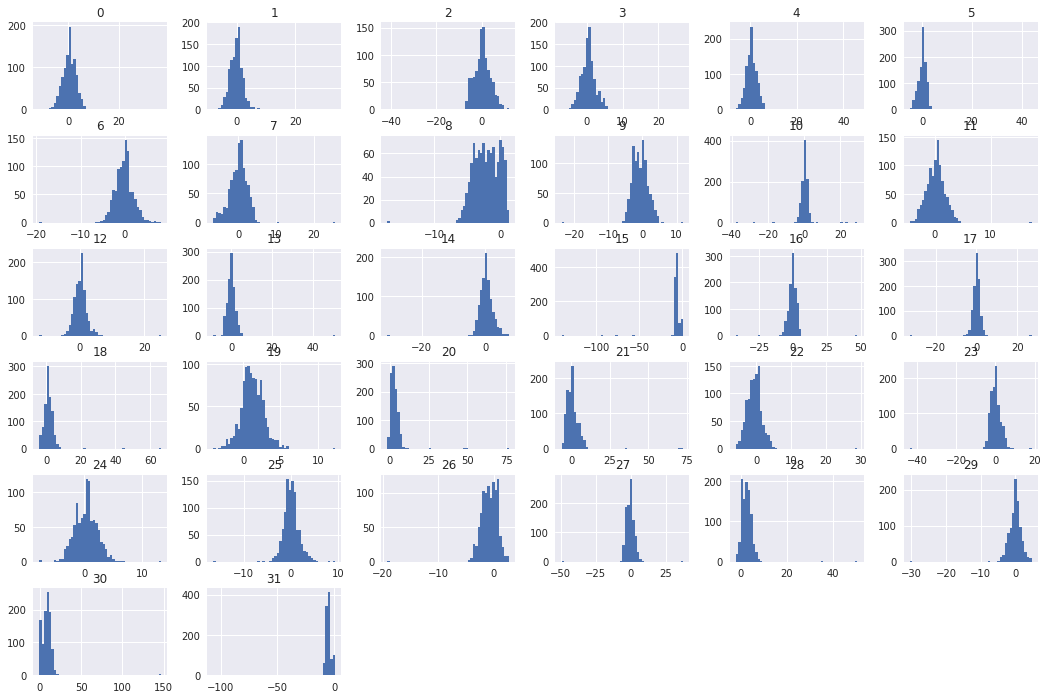

In [240]:
# seaborn.pairplot(netcla) # toto nije dobry napad. Tych atributov je strasne vela a kazdy s kazdym je dost velka matica
# plt.rcParams['figure.figsize'] = 18, 12
_ = challenge_data.hist(figsize=(18, 12), bins=50)

Niektore atributy sa tvaria, ze su z niecoho podobneho normalnemu rozdeleniu, ale niektore urcite nie. Napriklad stlpec s indexom 20

Skewness:  11.204489382533838


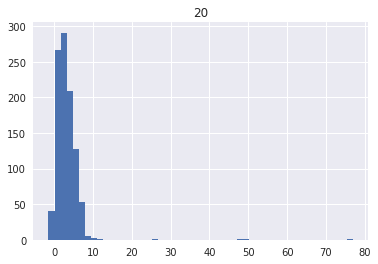

In [116]:
index = 20
pom = challenge_data[index].hist(bins=50)
pom.set_title(index)

import scipy.stats as stats
print('Skewness: ', stats.skew(challenge_data[index]))

Hodnota skewness je velmi vysoka a kladna, to znamena, ze rozdelenie nieje symetricke, ale je navazene do lava (k nizkym hodnotam). Je tam teda velmi vela nizkych hodnot a stale menej a menej extremne vysokych.

In [102]:
seaborn.boxplot(challenge_data[index])

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Boxplot nam nasiel nejakych outlierov medzi vysokymi hodnotami

Spocitajme si hodnotu pre fuzy. Vsetky pozorovania mimo tychto hodnot boli oznacene ako outlier

In [131]:
descr = challenge_data[index].describe()
whisker_r = descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))
whisker_r

descr = challenge_data[index].describe()
whisker_r = np.min([descr['max'], descr['75%'] + (1.5 * (descr['75%'] - descr['25%']))])
whisker_l = np.max([descr['min'], descr['25%'] - (1.5 * (descr['75%'] - descr['25%']))])
whisker_l, whisker_r

(-1.5215626955032349, 8.652123291027412)

Ten lavy fuz je vlastne minimum

In [103]:
challenge_data[20].min()

-1.5215626955032349

Kolko pozorovani bolo oznacenych ako outlier?

In [123]:
sum(challenge_data[20] > whisker_r)

8

lavy fuz je vlastne minimum, takze medzi malymi hodntami niesu ziadni outliery

### Boxplot nie je dobry na nesymetricke data. 
Skusme si tie data trochu upravit. Tak, aby boli symetrickejsie

Transformujme ich pomocou logaritmu.

Treba dat ale pozor na to, ze nevieme spocitat logaritmus zaporneho cisla

In [115]:
index = 20
transformed = np.log(challenge_data[index]+2) #posunme vsetky cisla tak aby sme nemali ziadne zaporne (Ked priratame +2, tak to bude viac ako dost)
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (log transform)" % index)
print("Skewness:", stats.skew(transformed))

Skewness: -0.09981990185102008


Po transformacii je hodnota skewness ovela blizsie k 0. Znamena to, ze rozdelenie je symetrickejsie.

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


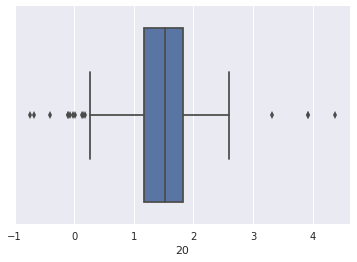

In [124]:
seaborn.boxplot(transformed)

Spocitajme si tie fuzy

In [130]:
descr2 = (transformed).describe()
whisker2_r = np.min([descr2['max'], descr2['75%'] + (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l = np.max([descr2['min'], descr2['25%'] - (1.5 * (descr2['75%'] - descr2['25%']))])
whisker2_l, whisker2_r

(0.20404823864545207, 2.798869737021752)

A kolko mame outlierov teraz?

In [132]:
sum(transformed > whisker2_r)

4

In [133]:
sum(transformed < whisker2_l)

11

Ak transformujeme data na nieco, co sa viac podoba na normalne rozdelenie (hlavne na rozdelenie, ktore je sustredene okolo nejakej strednej hodnoty), tak box plot nam najde uplne inych kandidatov na outlierov. V povodnom rozdeleni sme si vobec nemuseli vsimnut, ze nejake extremne hodnoty boli aj medzi malimi hodnotami (blizkymi 0) pretoze velka vaha rozdelenia bola posunuta k malim hodnotam.

Pri pouzivani box plotu, treba dat pozor na to aby bol rozdelenie sustredene okolo nejakej strednej hodnoty. Pozor na nesymetricke rozdelenia.

velmi casto sa pouziva Box-Cox transformacia. Robi nieco velmi podobne ako logaritmus. Len nemusite vy kontolovat zaklad logaritmu, ale dokaze sa ho to naucit z dat. Viac info o tom, ako Box-Cox funguje, najdete tu: http://onlinestatbook.com/2/transformations/box-cox.html

In [134]:
from scipy.stats import boxcox

In [227]:
index = 20
transformed, att = boxcox(challenge_data[index]+2)# boxcox vrati transformovane data a parametre transformacie. Tie viem zafixovat a v tom pripade mi to vrati len transformovane data
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: %d (box-cox)" % index)
print(att)

0.031902697078064354


Ten parameter, ktory to vratilo je dolezity. Treba si ho odlozit a pri transformovani testoacich dat ho dat ako druhy parameter transformacie. Vtedy sa ho transformacia nebude ucit, ale pouzije tento. Vrati teda uz len transformovane data bez tohto parametru.

## Dalsie normalizacie
Existuje cela skupina transformacii zalozenych na nasobeni vsrtkych dat a odcitnai nejakej hodnoty.

* z-normalization
> Stredna hodnota bude 0 a standardna odchylka 1shift = mean, scale = std
* 0-1 normalization: shift = min, scale =  max - min
> vsetky hodnoty budu v rozsahu 0-1, Pozor na to, ze minimum a maximim su velmi enstabilne hodnoty. Velmi lahko sa moze stat, ze v testovacich datach pride mensie minimum alebo vacsie maximu. Vy nemozete tretrenovavat transformaciu na novych datach. Vysledkom bude, ze sa vam mozu objavit hodnoty < 0 alebo > 1
* to iste ako 0-1 normalizacia robi StandardScaler v sklearn pre vsetky atributy v datasete naraz. Pozor ale na nesymetricke rozdelenia
* ak pouzijete RobustScaler, tak si viete poradit aj s outliermi (pouziva rozsah 1st quartile (25th quantile) and the 3rd quartile (75th quantile)). Stabilnejsie, ale hodnoty mimo intervalu 0-1 su bezne.


In [234]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

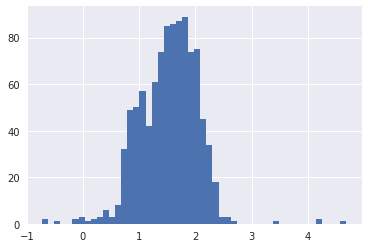

In [235]:
_ = plt.hist(transformed, bins=50)

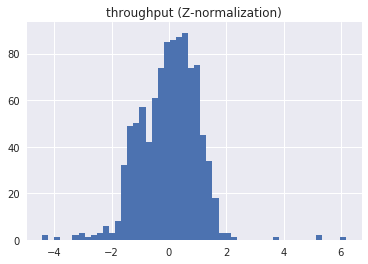

In [237]:
z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
_ = plt.hist(z_transformed, bins=50)
plt.title('throughput (Z-normalization)')

zmenila sa nam stredna hodnota a standardna odchylka

Aj sklearn ma uz v sebe predpripravenu z-normalizaciu

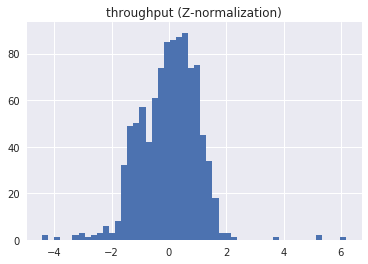

In [239]:
# sklearn.preprocessing
preprocessing.scale(transformed)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

# Na co okrem detekcie outlierov vobec robime normalizaciu?

Vela algoritmov robi s numerickymi datami rozne matematicke operacie. Ak pracuju s extremnymi hodnotami, tak mozu mat problemy.

Napriklad neuronova siet by musela mat pre pracu s takymito hodnotami velmi velke alebo velmi male vahy na hranach medzi neuronmi. Na to aby sa ich ale naucila zvycajne nema dostatok dat. Pri rozdeleniach velmi navazenych na jednu stranu nepomoze pridanie viac dat. Tie extremne hodnoty sa vyskytuju az prilis zriedkavo a ostatne ich prebiju. Lepsie je tie data transformovat.

Podobne su na tom aj vahy atributov napriklad v linearnej regresii. Ak by do nich prisla extremna hodnota, tak aj vysledok predikcie pojde velmi rychlo do extremov. 

# Transformacia numerickych atributov na kategoricke - diskretizacia

Pre niektore algoritmy ciselne data nie su uplne vhodne. Napriklad taky Naivny Bayes potrebuje kategoricke hodnoty. Tie sa daju vytvorit zaradenim numerickych hodnot do intervalov.

Intervaly su bud manualne nastavene, alebo take, aby ich sirka bola rovnaka (Equal width binning/discretization) alebo pocty prvkov (Equal frequency binning/discretization), ktore do nich spadaju boli priblizne rovnake. 

## Rovnaka sirka intervalov

In [246]:
bin_count = 10
bins = np.linspace(z_transformed.min(), z_transformed.max(), bin_count)
bins # toto su hranice intervalov binov. Intervaly su rovnako siroke

array([-4.42671654, -3.24692043, -2.06712432, -0.88732821,  0.29246791,
        1.47226402,  2.65206013,  3.83185624,  5.01165235,  6.19144847])

In [243]:
z_transformed[:10] # mala ukazka povodnych dat

array([ 0.10657099,  0.16580308,  0.8440961 , -1.24717423,  0.48185395,
       -0.55594854,  0.3699829 , -0.04235558, -1.22058166, -0.61991132])

In [268]:
ew_digitized = np.digitize(z_transformed, bins)
ew_digitized[:10] # Ukazka dat transfomrovanych na identifikatory binov

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 1])

<Container object of 9 artists>

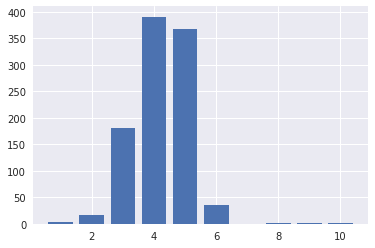

In [244]:
plt.bar(*np.unique(ew_digitized, return_counts=True))

intervaly su rovneko siroke, ale pocetnost pozorvani v nich je velmi rozdielna. Zachoval sa vlastne tvar toho povodneho rozdelenia

vsimnite si, ze uz nepouziame histogram, ale bar plot

pri rovnako sirokych intervaloch som rovnomerne rozdelil intrval medzi maximalnou a minimalnou hodnotou. Nic mi nebrani definovat si vlastne, rozne siroke intervaly a spravit z toho pristup pouzivajuci manualne definovane intervaly

Rozne siroke intervaly sa casto pouzivaju na zaradenie ludi do vekovych skupin: 0-15 deti, 15-18 tinedzeri, 18-25 mladi dospeli, 25-60 dospely, 60+ seniori

## Rovnaka pocetnost intervalov

Chceme, aby boli intervali priblizne rovnako pocetne.

In [264]:
data = challenge_data[20] # tuna nepotrebujeme transformovat data, ale ak by sme, tak nam to nijak neprekaza

bin_count = 10
percentiles = np.linspace(0, 100, bin_count, endpoint = False)
percentiles # chceme vytvorit intervaly, kde v kazdom bude 10% dat. Cize toto su hranice pocetnosti intervalov

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [265]:
bins = list(map(lambda x: np.percentile(data, x), percentiles))
bins # takto z hranic pocetnosti spravime hranice hodnot

[-1.5215626955032349,
 0.3481952660537032,
 0.878680005317,
 1.5704484939575194,
 2.106584409165542,
 2.592609643936157,
 3.1949773599911797,
 3.8665801048278805,
 4.695518307476256,
 5.678778468091513]

In [266]:
ef_digitized = np.digitize(data, bins)
ef_digitized[:10] # takto transformujeme hodnoty na identifikatory intervalov

array([6, 6, 8, 2, 7, 3, 7, 5, 2, 3])

<Container object of 10 artists>

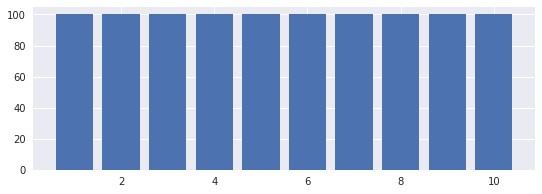

In [252]:
plt.bar(*np.unique(ef_digitized, return_counts=True))

kazdy interval obsahuje teraz uplne rovnaky pocet pozorovani.

### Co sa stane ak tu istu transformaciu pustime na testovacich datach?

<Container object of 11 artists>

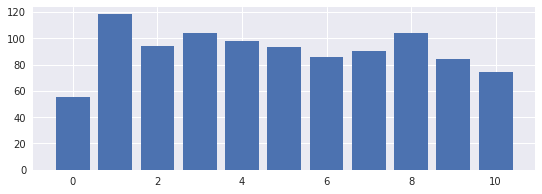

In [253]:
challenge_data_test = pd.read_csv("./data/x_test.csv", nrows=1000, sep=',', header=None)
test_data = challenge_data_test[20]

# nezmenim biny, cize pouzivam transformaciu, ktoru som natrenoval na trenovacich datach. Na toto si treba dat pozor. Nikdy transformaciu nemozem menit pre trenovacie a pre testovacie data
ef_digitized_test = np.digitize(test_data, bins)
plt.bar(*np.unique(ef_digitized_test, return_counts=True))

Teraz uz tie pocetnosti niesu uplne rovnomerne, ale to je len tym, ze testovacie data niesu uplne rovnake ako trenovacie.

# Transformacia numerickych dat na binarne

Toto je jednoduche, potrebujete si len zobrat nejaku hranicu a vsetko, co je pod nou bude 0 a nad nou 1

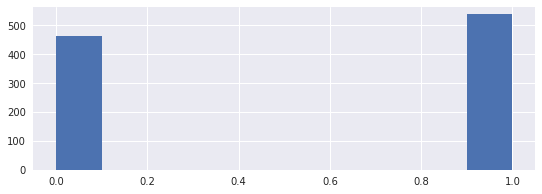

In [269]:
binarizer = preprocessing.Binarizer(0) # v tomto pripade je hranica 0
binary = binarizer.transform(z_transformed.reshape(1, -1))
pd.Series(binary[0]).hist()

# Transformacia kategorickych udajov na numericke

http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/

https://github.com/wdm0006/categorical_encoding

https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/

### Existuje viacero sposobov ako transformovat kategoricku hodnotu na cislo 

1. Ordinal - priradzovanie cisel postupne roznym hodnotam
2. One-hot - z kazdej kategorie vznikne stlpec s hodnotou 1 v tych riadkoch, ktore boli nastavene na tuto hodnotu. inde 0
3. Binary - zoberie sa ordinal, zakoduju sa tie cisla ako binarne, kazda cislica binarneho cisla je pouzita ako stlpec a tam kde bola na zodpovedajucom mieste 1, tam bude v stlpci 1 a inak 0
4. Sum - porovnava sa priemer zavislej premennej na riadokch jednej skupiny oproti priemeru zavislej premennej na celej datovej sade
5. Helmert - velmi podobne ako Sum, len jedinecnost categorickej hodnoty je dana inou kombinaciou hodnot
6. BackwardDifferenceEncoder - velmi podobne ako Sum, len jedinecnost categorickej hodnoty je dana inou kombinaciou hodnot
7. Polynomial - trenuje koeficienty ploynomialnej regresie rozneho stupna, ktore sa daju pouzit na regresiu zavislej premennej (neviem aky to ma zmysel pre maly pocet roznych hodnot) (treba ordinalne premenne)
8. Hash - zahashuje string kategorickej premennej a moduluje ho poctom roznych hodnot. Je v sklearn http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html
9. V ostatnej dobe su velmi popularne tzv Embeddingy. Reprezentacia naucena pomocou neuronovej siete.

Zaujimave su asi len prve 4, cislo 7 a 9, ostatne su len obmeny tychto s tym, ze menia rozdelenia hodnot

In [254]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [255]:
# pip install category_encoders
import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# encoder = ce.BinaryEncoder()
# encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
encoder = ce.OneHotEncoder() # tento je aj v sklearn.preprocessing.OneHotEncoder, tu su ale vsetky a maju rovnaky predpis
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()

In [256]:
# odstranime chybajuce hodnoty
titanic_X = titanic.dropna().reindex(columns=[x for x in titanic.columns.values if x != 'Survived'])
titanic_y = titanic.dropna().reindex(columns=['Survived'])

In [257]:
# Zakodujeme kategoricke data
encoder.fit(titanic_X, titanic_X.Fare)
titanic_categorical = encoder.transform(titanic_X)
titanic_categorical.head()

Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  Name_7  Name_8  \
1        1       0       0       0       0       0       0       0       0   
3        0       1       0       0       0       0       0       0       0   
6        0       0       1       0       0       0       0       0       0   
10       0       0       0       1       0       0       0       0       0   
11       0       0       0       0       1       0       0       0       0   

    Name_9   ...     Embarked_0  Embarked_1  Embarked_2  Embarked_-1  \
1        0   ...              1           0           0            0   
3        0   ...              0           1           0            0   
6        0   ...              0           1           0            0   
10       0   ...              0           1           0            0   
11       0   ...              0           1           0            0   

    PassengerId  Pclass   Age  SibSp  Parch     Fare  
1             2       1  38.0      1      0  71.2833  
3             4       1  35.0      1      0  53.1000  
6             7       1  54.0      0      0  51.8625  
10           11       3   4.0      1      1  16.7000  
11           12       1  58.0      0      0  26.5500  

[5 rows x 459 columns]

Toto sme asi uplne nechceli. Treba si davat pozor na to kolko roznych hodnot ma kategoricka premenna. Tu sme sa pokusili zakodovat meno, ktore ma velmi vela unikatnych hodnot a teda nam vzniklo velmi vela roznych stlpcov. Vo vseobecnosti to nie je dobry napad